In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=10000)

In [2]:
df = pd.read_csv("US Aid.csv")

In [3]:
df = df.drop(["activity_start_date","activity_end_date","dac_category_name","channel_category_name","channel_subcategory_name"], axis=1)
df = df[df["current_amount"]>0]

In [6]:
df.head(15)

,_id,implementing_agency_acronym,implementing_agency_name,subagency_acronym,subagency_name,channel_name,dac_sector_name,dac_purpose_name,funding_account_name,assistance_category_name,activity_name,fiscal_year,current_amount,funding_agency_name,funding_agency_acronym,aid_type_group_name,activity_description
0,1,USAID,U.S. Agency for International Development,ASIA,Bureau for Asia,Government of Pakistan,Emergency Response,Material relief assistance and services,Economic Support Fund,Economic,Pakistan Emergency Economic Assistance,2002,600000000,U.S. Agency for International Development,USAID,Budget support,Pakistan Emergency Economic Assistance
1,2,DOD,Department of Defense,OSD,Office of the Secretary of Defense,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,"Department of the Army, Pakistan Counterinsurg...",Military,Pakistan Counterinsurgency Fund,2010,507727974,Department of the Army,ARMY,Project-Type,This program finances the cost of developing t...
2,3,DOD,Department of Defense,OSD,Office of the Secretary of Defense,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,"Department of the Army, Pakistan Counterinsurg...",Military,Pakistan Counterinsurgency Fund,2011,371357716,Department of the Army,ARMY,Project-Type,This program finances the cost of developing t...
3,4,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2019,368443545,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
4,5,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2009,300000000,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
5,6,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2005,298000000,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
6,7,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2008,297570000,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
7,8,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2007,297000000,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
8,9,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2006,297000000,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
9,10,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2011,295408000,Department of Defense,DOD,Pro

In [7]:
df_fiscalyear = df.groupby(["fiscal_year"],as_index=False)["current_amount"].sum()
df_fiscalyear.head()

,fiscal_year,current_amount
0,2001,91901516
1,2002,798067788
2,2003,536894538
3,2004,346375655
4,2005,629724777


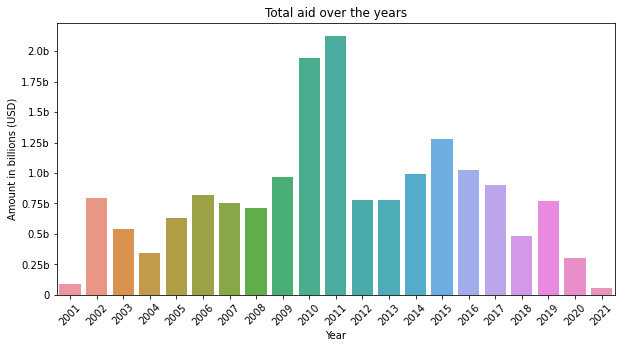

In [120]:
def convert_ylabels(labels,postfix):
    if postfix=='m':
        new_values = [label/1000000 for label in labels]
    elif postfix=='b':
        new_values = [label/1000000000 for label in labels]        
    new_labels = [str(val)+postfix if val!=0 else '0' for val in new_values]
    return new_labels

def plot_bar(x, y, data, ax, title, xlabel, ylabel, x_rotate=0, ylabel_postfix='m',convert_ylabel=False ):        
    sns.barplot(x, y, data = data, ax=ax)
    xticks = ax.get_xticklabels()
    ax.set_xticklabels(xticks,rotation=x_rotate)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)   
    ax.ticklabel_format(useOffset=False, style='plain', axis='y')
    
    if convert_ylabel==True:
        ylabels = convert_ylabels(ax.get_yticks(),ylabel_postfix)
        ax.set_yticklabels(ylabels, fontsize=10)
    
    return ax

fig,ax = plt.subplots(figsize=(10,5))

ax = plot_bar("fiscal_year","current_amount" ,df_fiscalyear, ax, "Total aid over the years",
         "Year", "Amount in billions (USD)", 45, 'b', convert_ylabel=True)
plt.show()

In [77]:
df_categorised

,assistance_category_name,current_amount
0,Economic,11606386441
1,Military,5491702339


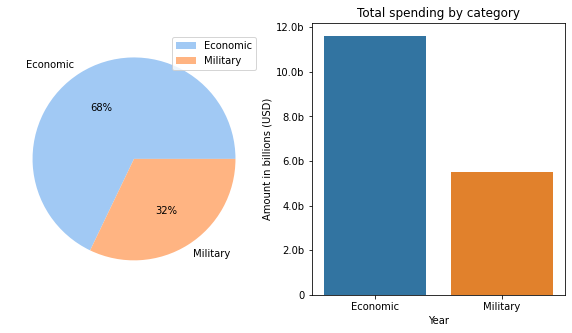

In [121]:
df_categorised = df.groupby("assistance_category_name",as_index=False)["current_amount"].sum()

fig,ax = plt.subplots(ncols=2, figsize=(10,5))
colors = sns.color_palette('pastel')[0:5]
ax[0].pie(df_categorised["current_amount"], labels = df_categorised["assistance_category_name"], colors = colors, autopct='%.0f%%')
ax[0].legend(loc=1, fontsize=10)

# # plt.bar(df_categorised["assistance_category_name"], df_categorised["current_amount"])
ax[1]=plot_bar("assistance_category_name","current_amount",df_categorised,ax[1], "Total spending by category",
        "Year", "Amount in billions (USD)",0,'b', convert_ylabel=True)
plt.show()

The two big categories are Economic and Military. According to this data, Pakistan has received almost USD 5.5 billion for military and USD 11.6 billion for economic purposes from 2001-2021.
There are many subcategories under these two. Let's explore both of these categories one by one

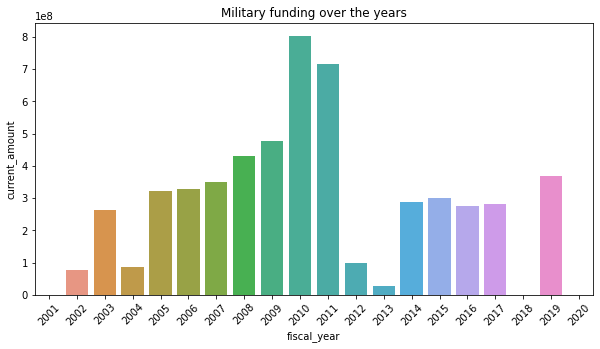

In [38]:
df_mil = df[df["assistance_category_name"]=="Military"]
df_econ = df[df["assistance_category_name"]=="Economic"]

df_mil_yearly = df_mil.groupby("fiscal_year",as_index=False)["current_amount"].sum()

fig,ax = plt.subplots(figsize=(10,5))
plot_bar("fiscal_year","current_amount",df_mil_yearly,ax,"Military funding over the years")
plt.show()

In [29]:
df_mil.groupby("dac_purpose_name")["current_amount"].sum()

dac_purpose_name
Narcotics control                         307154000
Research/scientific institutions             544996
Security system management and reform    5183618663
Water supply - large systems                 384680
Name: current_amount, dtype: int64

The two big categories that the military received aid for is __Narcotics Control__ and __Security System Management and Reform__. Before diving into Security System Management and Reform, lets look at Narcotics Control. 
The funding is provided by Department of Defense, Drug Interdiction and Counter-Drug Activities. This funding is described like follows
"In-Country Counternarcotics Program under U.S. Central Command. The U.S. Department of Defense International Counter-Drug Program (ICDP) enables the Secretary of Defense to provide foreign governments with support, such as training and equipment, to combat illicit drug trafficking and transnational organized crime.". This funding has been provided 17 times for a total of just over USD 300 million.

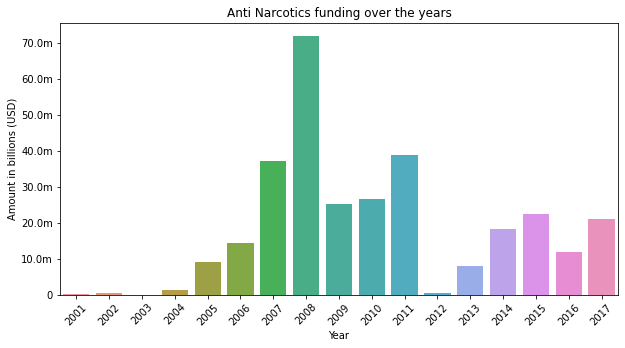

In [140]:
df_narc = df_mil[df_mil["dac_purpose_name"]=="Narcotics control"]
df_narc_yearly = df_narc.groupby("fiscal_year", as_index=False)["current_amount"].sum()
fig,ax = plt.subplots(figsize=(10,5))
plot_bar("fiscal_year","current_amount",df_narc_yearly,ax,"Anti Narcotics funding over the years",  
         "Year", "Amount in billions (USD)", 45, 'm', convert_ylabel=True)
plt.show()

The interesting thing is the funding provided in 2008 which amounts to over USD 70 million, almost double than any other year. I have been unable to find any information on anti narcotics funding though.

__Security system management and reform__ is primarily the category under which we have received military financing. There are many subcategories but lets look at the top 5.

In [42]:
df_ssm = df_mil[df_mil["dac_purpose_name"]=="Security system management and reform"]
df_ssm.head()

,_id,implementing_agency_acronym,implementing_agency_name,subagency_acronym,subagency_name,channel_name,dac_sector_name,dac_purpose_name,funding_account_name,assistance_category_name,activity_name,fiscal_year,current_amount,funding_agency_name,funding_agency_acronym,aid_type_group_name,activity_description
1,2,DOD,Department of Defense,OSD,Office of the Secretary of Defense,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,"Department of the Army, Pakistan Counterinsurg...",Military,Pakistan Counterinsurgency Fund,2010,507727974,Department of the Army,ARMY,Project-Type,This program finances the cost of developing t...
2,3,DOD,Department of Defense,OSD,Office of the Secretary of Defense,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,"Department of the Army, Pakistan Counterinsurg...",Military,Pakistan Counterinsurgency Fund,2011,371357716,Department of the Army,ARMY,Project-Type,This program finances the cost of developing t...
3,4,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2019,368443545,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
4,5,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2009,300000000,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...
5,6,DOD,Department of Defense,DSCA,Defense Security Cooperation Agency,U.S. Government - Department of Defense,"Conflict, Peace, and Security",Security system management and reform,Foreign Military Financing Program,Military,DOD - Foreign Military Financing (FMF) Program...,2005,298000000,Department of Defense,DOD,Project-Type,The amount of credit extended to a foreign gov...


In [56]:
df_ssm_activity = df_ssm.groupby("activity_name",as_index=False)["current_amount"].sum()
df_ssm_activity = df_ssm_activity.nlargest(3,"current_amount")
df_ssm_activity.head()


,activity_name,current_amount
2,DOD - Foreign Military Financing (FMF) Program...,3786950545
7,Pakistan Counterinsurgency Fund,1094526157
6,"DoD Excess Defense Articles, Grant Authority",160390458


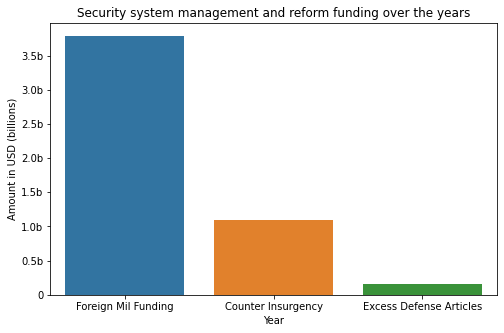

In [136]:
fig,ax = plt.subplots(figsize=(8,5))
ax = plot_bar("activity_name","current_amount",df_ssm_activity,ax,
         "Security system management and reform funding over the years",
         "Year","Amount in USD (billions)", 0, 'b', True)
xticklabels = ["Foreign Mil Funding","Counter Insurgency","Excess Defense Articles"]
ax.set_xticklabels(xticklabels)
plt.show()

The total military financing Pakistan has received under Foreign Military Financing program is over USD 3.5 over 20 years. The second highest aid has been underr Pakistan Counterinsurgency Fund, almost USD 1 billion. These two require a little in depth analysis.

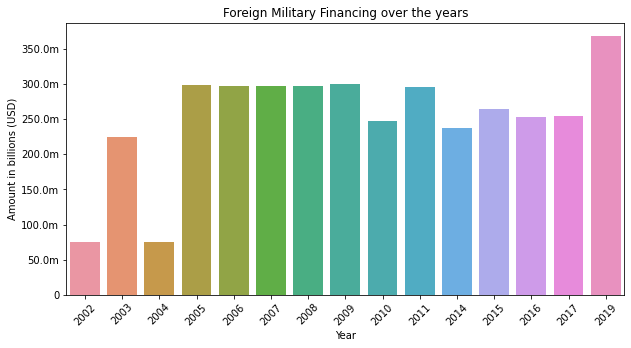

In [137]:
df_fmf = df_ssm[df_ssm["activity_name"]=="DOD - Foreign Military Financing (FMF) Program, Payment Waived"]
df_fmf_yearly = df_fmf.groupby("fiscal_year",as_index=False)["current_amount"].sum()
fig,ax = plt.subplots(figsize=(10,5))
plot_bar("fiscal_year", "current_amount", df_fmf_yearly, ax,
         "Foreign Military Financing over the years",  "Year", 
         "Amount in billions (USD)", 45, 'm', convert_ylabel=True)
plt.show()

Contrary to popular belief, our foreign military funding has remained constant around USD 250 million over the years despite the ups an downs in the relationship with ths US. However, the overall military funding did go down as shown above.

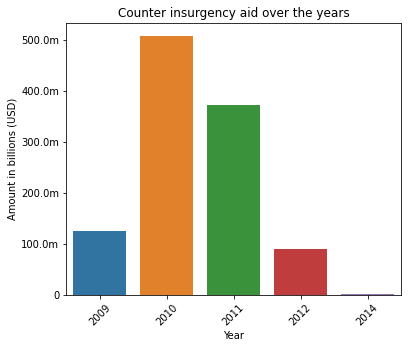

In [138]:
df_counterinsurg = df_ssm[df_ssm["activity_name"]=="Pakistan Counterinsurgency Fund"]
df_counterinsurg_yearly = df_counterinsurg.groupby("fiscal_year",as_index=False)["current_amount"].sum()
fig,ax = plt.subplots(figsize=(6,5))
plot_bar("fiscal_year", "current_amount", df_counterinsurg_yearly, ax,
         "Counter insurgency aid over the years",  "Year", "Amount in billions (USD)", 
         45, 'm', convert_ylabel=True)
plt.show()

Pakistan received Counter Insurgency fund in only 5 years. 2010 was the year the most aid was received followed by 2011, 2009, 2012 and 2014 respectively. Counter insurgency funding is probably why the overall military aid was higher in 2010 and also in 2011 compared to the rest of the years.

Enough talk about military aid. Lets look at economic aid which is more diverse and interesting.

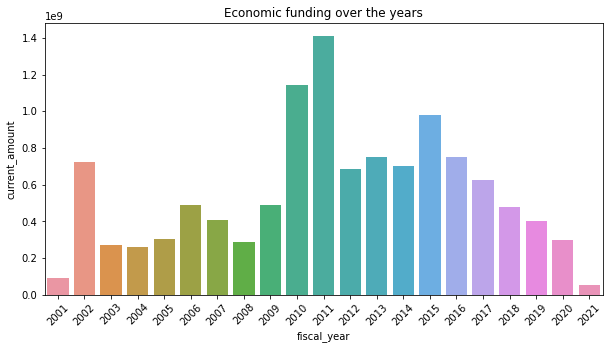

In [65]:
df_econ_yearly = df_econ.groupby("fiscal_year",as_index=False)["current_amount"].sum()

fig,ax = plt.subplots(figsize=(10,5))
plot_bar("fiscal_year","current_amount",df_econ_yearly,ax,"Economic funding over the years")
plt.show()

In [72]:
df_econ_cats = df_econ.groupby("dac_purpose_name",as_index=False)["current_amount"].sum()
df_econ_cats.sort_values(by=["current_amount"],ascending=False)

,dac_purpose_name,current_amount
54,Material relief assistance and services,2295256477
51,Legal and judicial development,915679379
30,Emergency food assistance,901957871
35,Energy policy and administrative management,860672855
65,Primary education,788156117
84,Transport policy and administrative management,620019798
80,Social Protection,475908915
22,Decentralisation and support to subnational go...,398953891
3,Agricultural development,398054839
0,Action relating to debt,387351336
